#Requirements 📚

In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly 
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import Image

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm

## for machine learning
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV,cross_val_score, cross_val_predict
from sklearn import preprocessing, ensemble, metrics, tree, neighbors
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor


np.random.seed(706475)
np.random.RandomState(706475)

RandomState(MT19937) at 0x7FABA03A1490

# Data Set 💾

## Data Set Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the `prediction of bike count` required at each hour for the stable supply of rental bikes.

The dataset contains weather information **(Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall)**, the number of bikes rented per hour and date information.

## Relevant Papers / Citation Request

[1] **Sathishkumar V E, Jangwoo Park, and Yongyun Cho**. _'Using data mining techniques for bike sharing demand prediction in metropolitan city.'_ Computer Communications, Vol.153, pp.353-366, March, 2020

[2] **Sathishkumar V E and Yongyun Cho**. _'A rule-based model for Seoul Bike sharing demand prediction using weather data'_ European Journal of Remote Sensing, pp. 1-18, Feb, 2020

## Context

Bike sharing is one of the ways to reduce urban traffic. It also reduces air pollution by reducing the number of cars on the road. The bike sharing system is a new generation of traditional bike rental systems, and the entire process has been automated. Users can borrow bicycles for free or for a fee and return them to another place.

The hypothesis in the research is that the bike sharing is highly related with the time of the day, season, and weather conditions. The research will try to predict the bike shares in the future. We are going to try to understand the factors on which the demand for these shared bikes depends.

This dataset contains the hourly and daily count of rental bikes between in 2017-2018 in in Seoul with the corresponding weather and seasonal information.


## Import the Data Set

In [ ]:
path_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'
df = pd.read_csv(path_data,sep=",",encoding= 'unicode_escape')

##Features

* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of he day
* **Temperature** -Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

# Data analysis 📊

## Reading and understanding the Data

Let's inspect the various aspects of our dataframe

In [ ]:
df.shape

(8760, 14)

We have 8760 instances with 14 different variables to work on.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



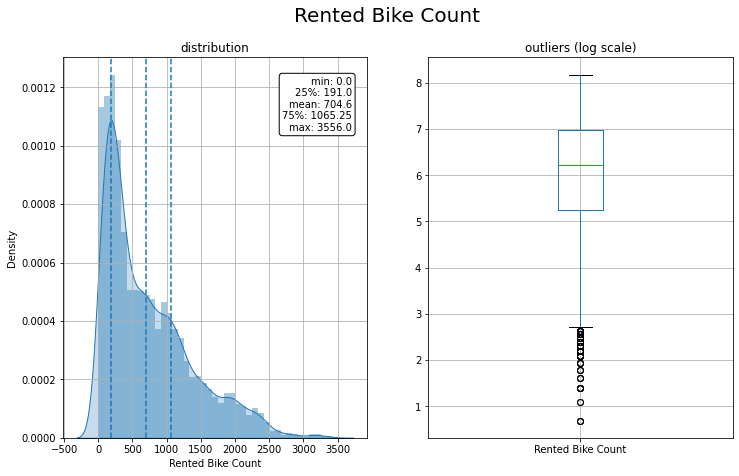

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,7))
fig.suptitle("Rented Bike Count", fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = df["Rented Bike Count"].fillna(df["Rented Bike Count"].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df["Rented Bike Count"].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df["Rented Bike Count"])
tmp_dtf["Rented Bike Count"] = np.log(tmp_dtf["Rented Bike Count"])
tmp_dtf.boxplot(column="Rented Bike Count", ax=ax[1])
plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Looking at the statistics of our data set we can see that the max rented bike count for an hour in this data set is 3556. Which is pretty much considering the mean rented bike count for an hour which is equal to 704, so 5 times the mean.

The distribution is highly skewed and there are outliers on just one side.

Let's look at if there are any duplicated or NaN values

In [ ]:
df.duplicated().value_counts()

False    8760
dtype: int64

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

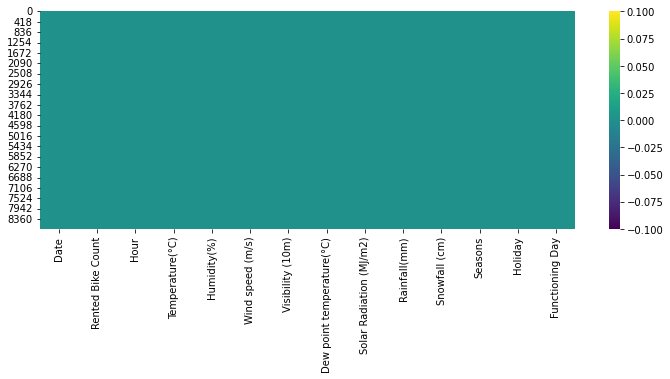

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cmap="viridis")

We have not a single missing value. Very clean data.

Let's look at the data types to see which columns need to be transformed/encoded to a number.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

_Rented Bike Count_ is our target variable that we want to understand and predict

_Seasons, Holiday, Functioning Day_ are categorical variables while the others are numericals (they will need to be encoded)

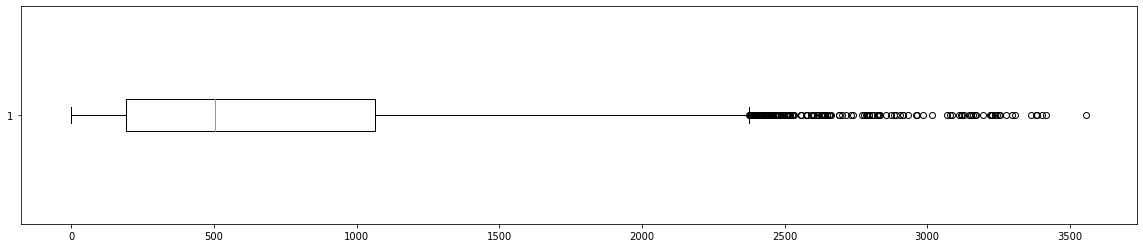

In [ ]:
plt.subplots(figsize=(20,4))
plt.boxplot(df["Rented Bike Count"],vert=False)
plt.show()

This boxplot confirm that we have no abnormal value that we need to get rid of

## Data visualisation

To help us visualise our data set over time we are going to make feature engineering and extract the month, the year and the day of the month of the column _Date_.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format ="%d/%m/%Y")
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day']=df['Date'].dt.day

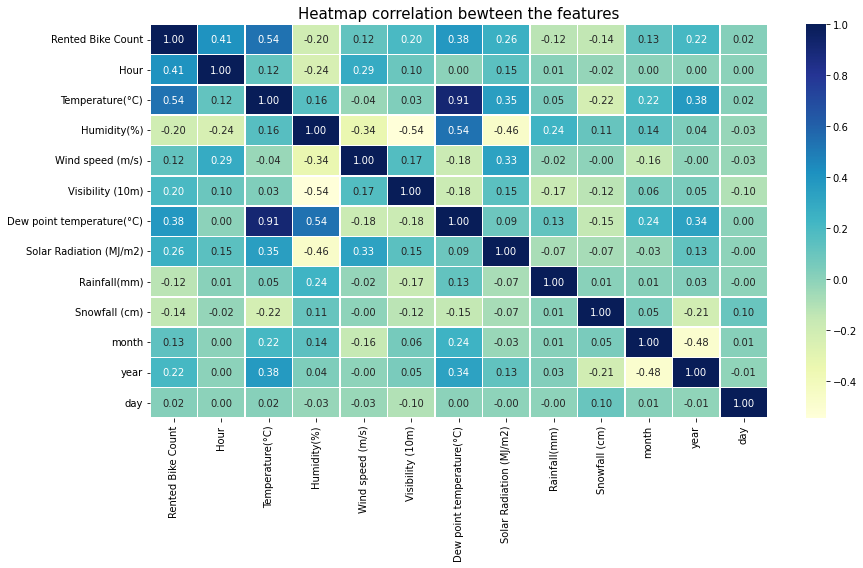

In [ ]:
plt.subplots(figsize=(13,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot = True, cbar = True, linewidths=0.5,fmt='.2f')
plt.title("Heatmap correlation bewteen the features",fontsize=15,fontweight="medium")
plt.tight_layout()

About the plot above, variable of **Temperature(°C)** and **Dew point temperature (°C)** looks like similar. Basically if the features have a very high correlation with each other (0.91) we can drop one of them (we'll a bit later).

For better understanding, let's see the correlation between our target variable which is `Rented Bike Count` and the others.

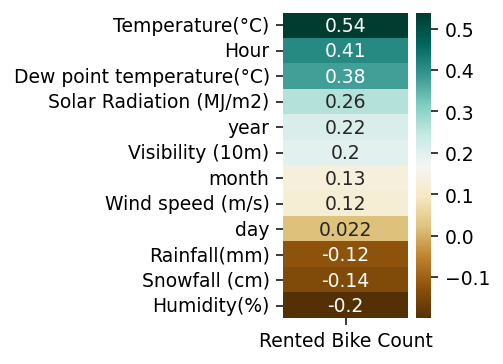

In [ ]:
plt.figure(figsize=(1.5,3), dpi=135)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values(by="Rented Bike Count", ascending=False)[1:],annot=True,cmap='BrBG')
plt.show()

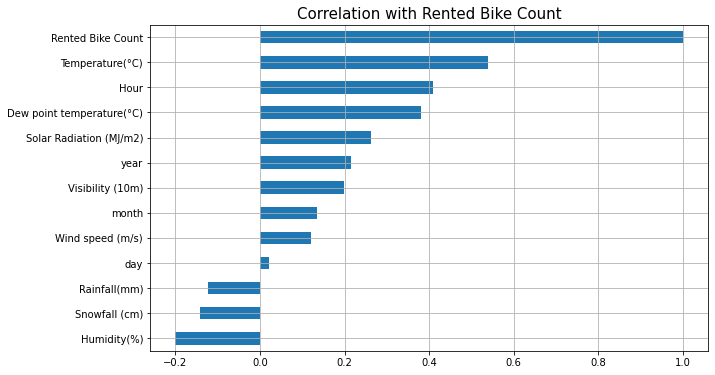

In [ ]:
plt.figure(figsize=(10,6))
target_variable = round(df.corr().iloc[0].sort_values(), 3)
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,6),grid=True);
plt.title("Correlation with Rented Bike Count",fontsize=15,fontweight="medium")
plt.show()

We can conclude that the temperature determines a higher rented bike count. That makes sense as higher temperature mean a warmer day and people are more likely to use bikes during warmer days.

The hour of the day also has a high correlation with our target variables. We can suppose that people use bikes at specifics periods of the day.

There is also a weak negative relationship (-0.2) between humidity and the number of Rented Bike.

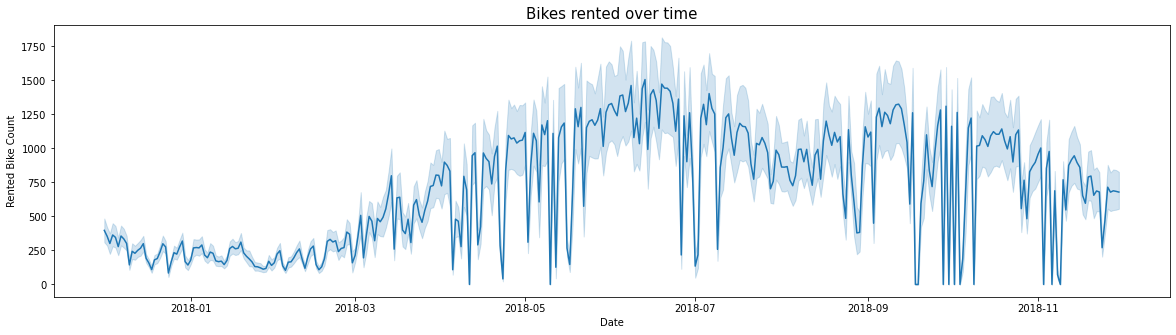

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x = "Date", y = "Rented Bike Count")
plt.title("Bikes rented over time",fontsize=15,fontweight="medium")
plt.show()

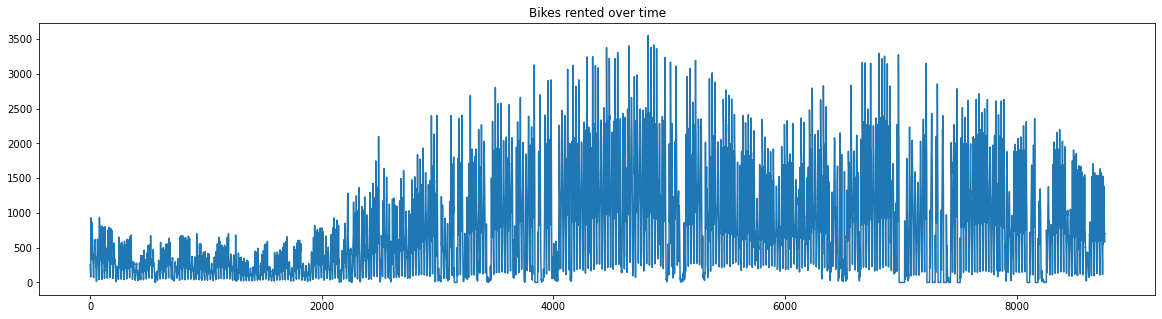

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Bikes rented over time")
df["Rented Bike Count"].plot.line()

By plotting the number of rented bikes over time we observe a higher demand of bikes during 2018's summer (06/2018-08/2018). We can suppose it is because the temperature is higher in summer and people tend to take bikes to visit or enjoy while they are in vacations.

Let's now have a look at the distribution of the different variables we have.

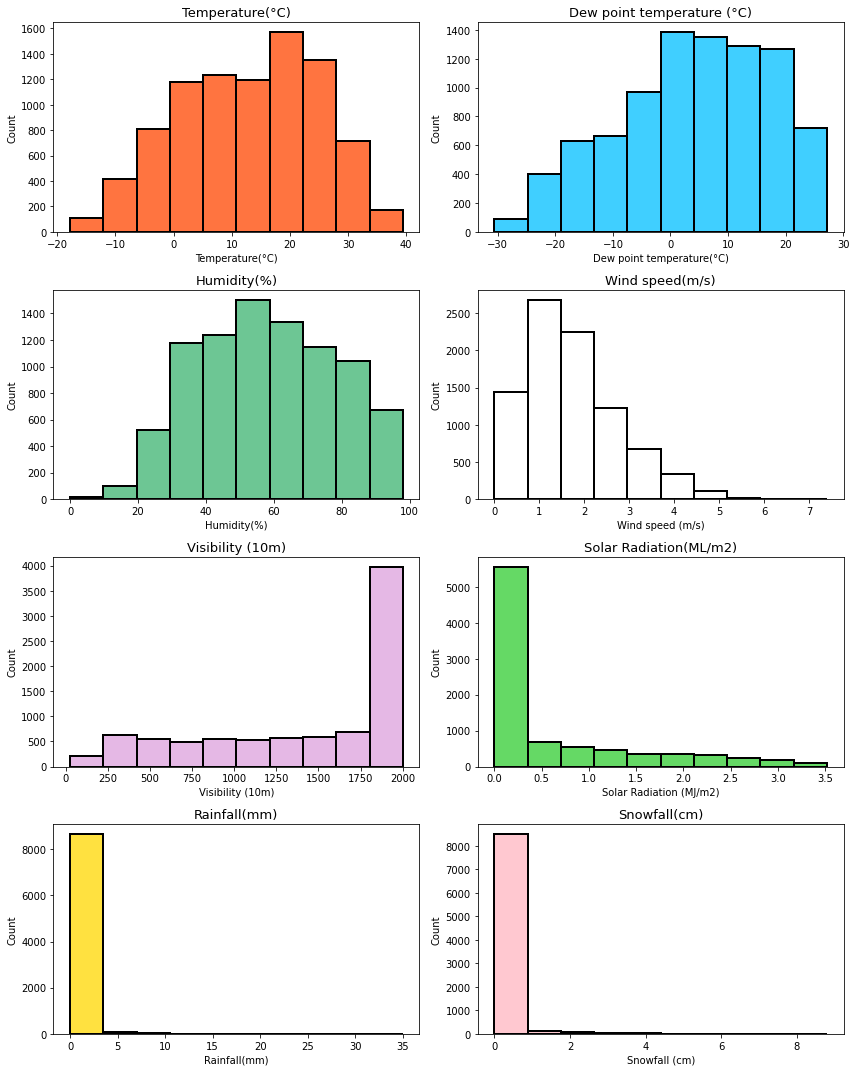

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (12,15))
sns.histplot(data=df, x ="Temperature(°C)", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("Temperature(°C)", fontsize = 13)
sns.histplot(data=df, x ="Dew point temperature(°C)", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("Dew point temperature (°C)", fontsize = 13)
sns.histplot(data=df, x ="Humidity(%)", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("Humidity(%)", fontsize = 13)
sns.histplot(data=df, x ="Wind speed (m/s)", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("Wind speed(m/s)", fontsize = 13);
sns.histplot(data=df, x ="Visibility (10m)", ax = ax[2][0], bins = 10, stat = "count", color = "plum", edgecolor = "black", linewidth = 2).set_title("Visibility (10m)", fontsize = 13)
sns.histplot(data=df, x ="Solar Radiation (MJ/m2)", ax = ax[2][1], bins = 10, stat = "count", color = "limegreen", edgecolor = "black", linewidth = 2).set_title("Solar Radiation(ML/m2)", fontsize = 13)
sns.histplot(data=df, x ="Rainfall(mm)", ax = ax[3][0], bins = 10, stat = "count", color = "gold", edgecolor = "black", linewidth = 2).set_title("Rainfall(mm)", fontsize = 13)
sns.histplot(data=df, x ="Snowfall (cm)", ax = ax[3][1], bins = 10, stat = "count",  color = "lightpink", edgecolor = "black", linewidth = 2).set_title("Snowfall(cm)", fontsize = 13);
plt.tight_layout()

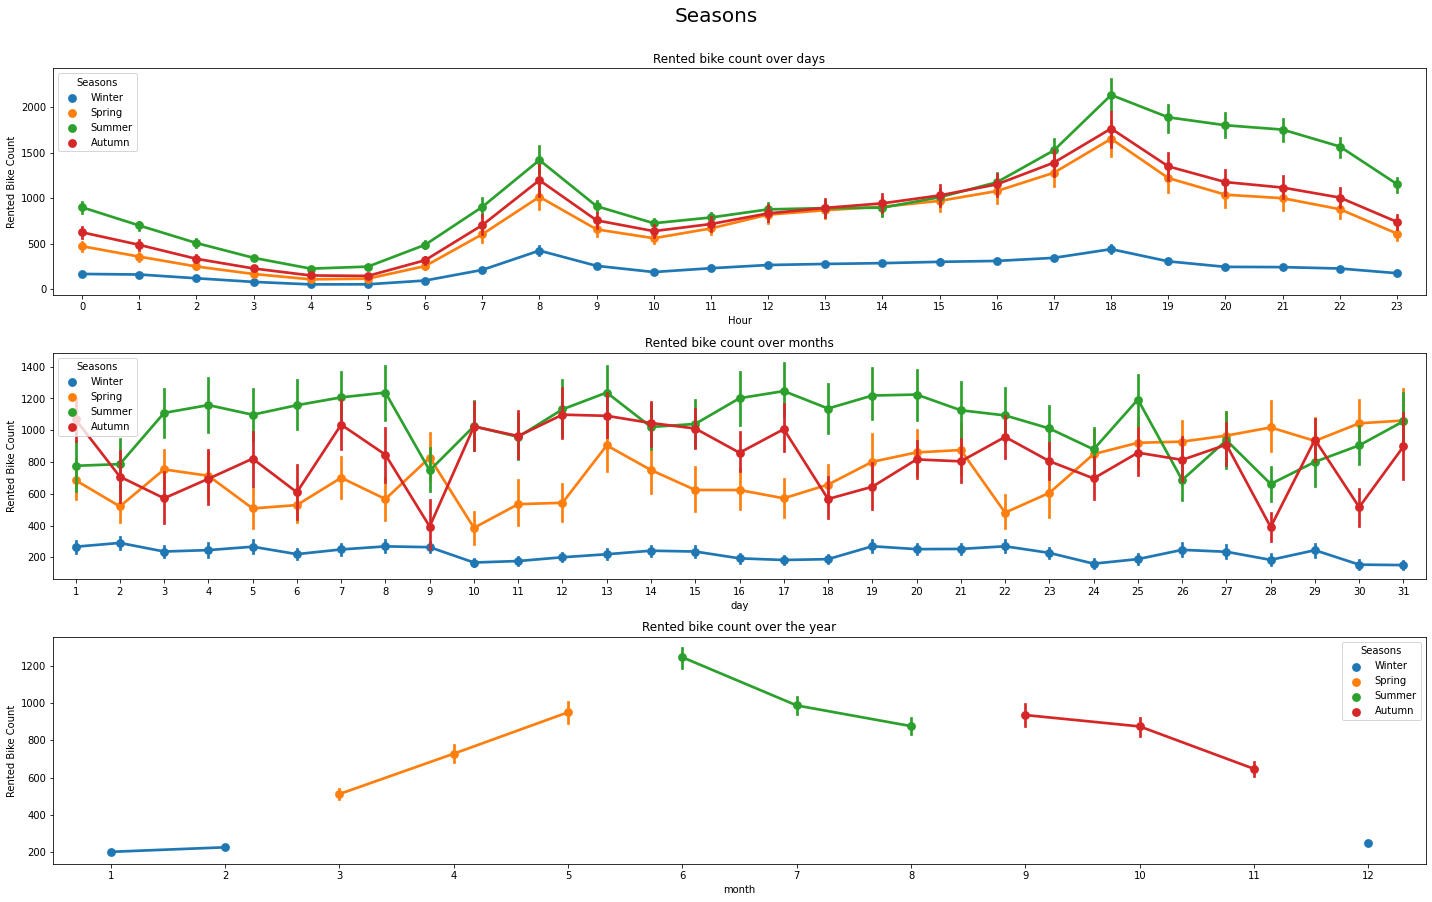

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (20,12))
fig.suptitle("Seasons", fontsize=20,y=1.04)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons",ax=axs[0]).set_title("Rented bike count over days")
sns.pointplot(data = df, x = "day", y = "Rented Bike Count", hue = "Seasons",ax=axs[1]).set_title("Rented bike count over months")
sns.pointplot(data = df, x = "month", y = "Rented Bike Count", hue = "Seasons",ax=axs[2]).set_title("Rented bike count over the year")
plt.tight_layout()
plt.show()

Overall we can see that during summer the number of rented bike count is the highest and during the winter the lowest.  Which confirms the high correlation bewteen the number of rented bike and the temperature, the temperature being warmer in summer, that we saw on the heatmap correlation before.

Looking at the first plot we can conclude that people are more likely to use bikes at 8am and 6pm.

Again as we notified in the last lineplot of the rented bikes over time. The demand increase between may and august.

Text(0.5, 1.0, 'Wind speed by Temperature for each season')

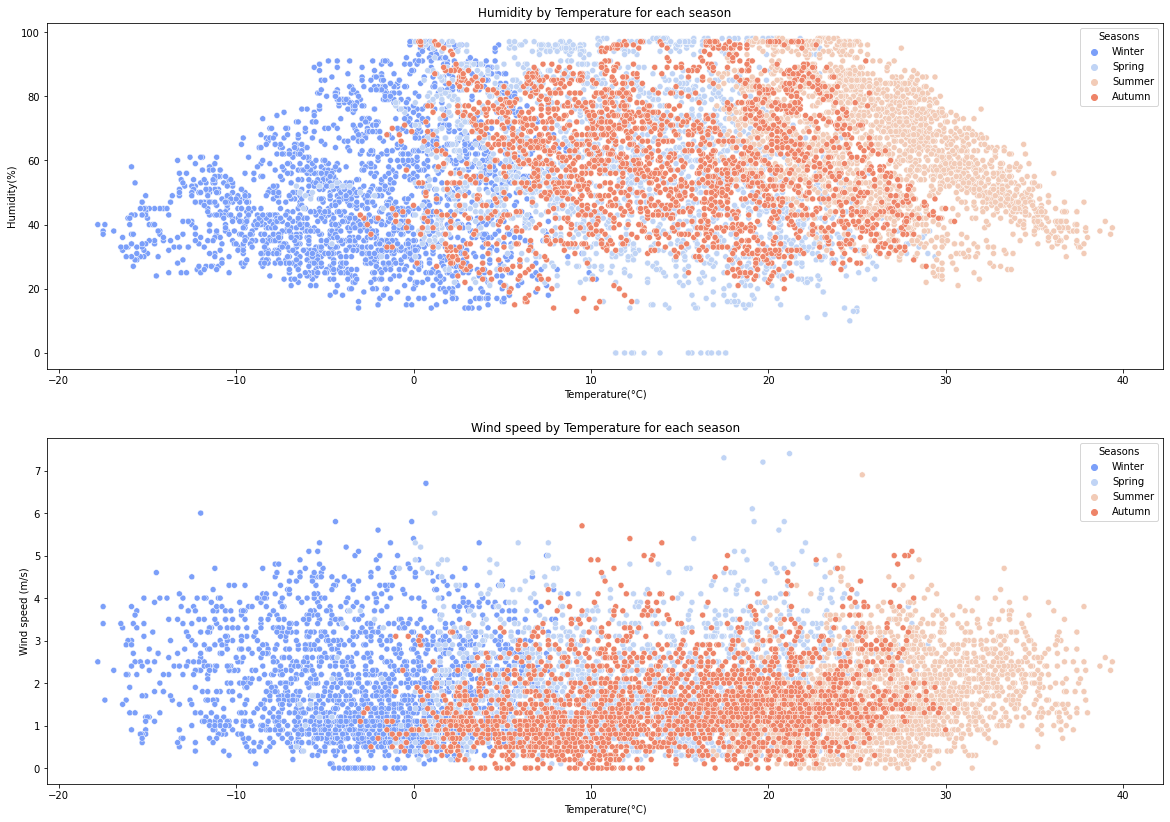

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (20,14))
sns.scatterplot(x = "Temperature(°C)", y = "Humidity(%)", hue = "Seasons", data = df, palette = "coolwarm",ax = ax[0]).set_title("Humidity by Temperature for each season")
sns.scatterplot(x = "Temperature(°C)", y = "Wind speed (m/s)", hue = "Seasons", data = df, palette = "coolwarm",ax = ax[1]).set_title("Wind speed by Temperature for each season")

The plots above shows that with the temperature the humidity is also higher in summer but during winter the wind speed is strong. This may explain why people don't use bikes as much as during summer.

### More data visualization over time

Here are some plots explaining more details about the number of rented bike count over time.

#### By hour

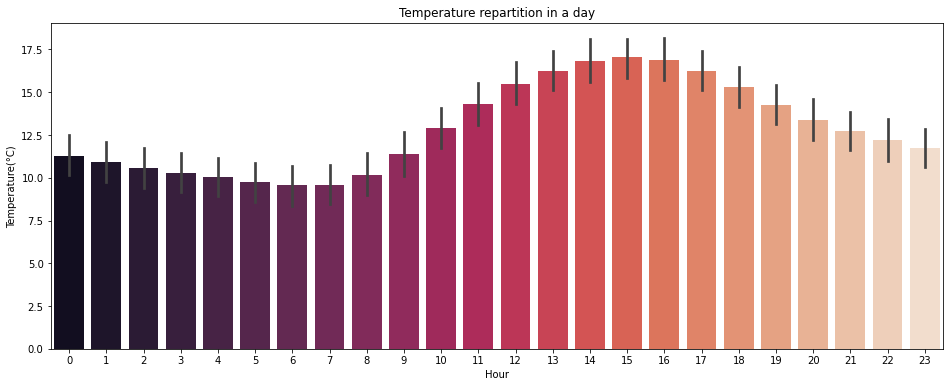

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Temperature repartition in a day")
sns.barplot(data=df,x="Hour",y="Temperature(°C)",palette="rocket")

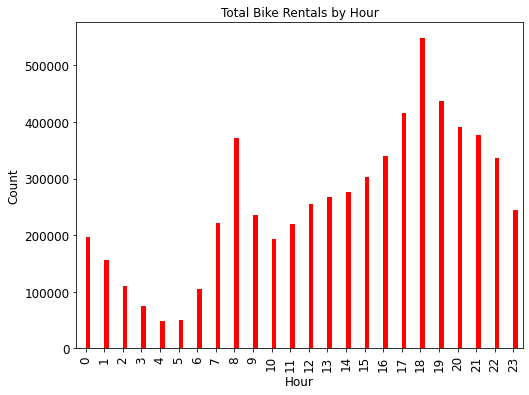

In [ ]:
ax = df[["Hour","Rented Bike Count"]].groupby(['Hour']).sum().reset_index().plot(kind='bar', figsize=(8, 6),legend = False, title ="Total Bike Rentals by Hour",color='red', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

With those plots we can see that people do not necessarily use bikes during the warmer period of the day.

#### By day

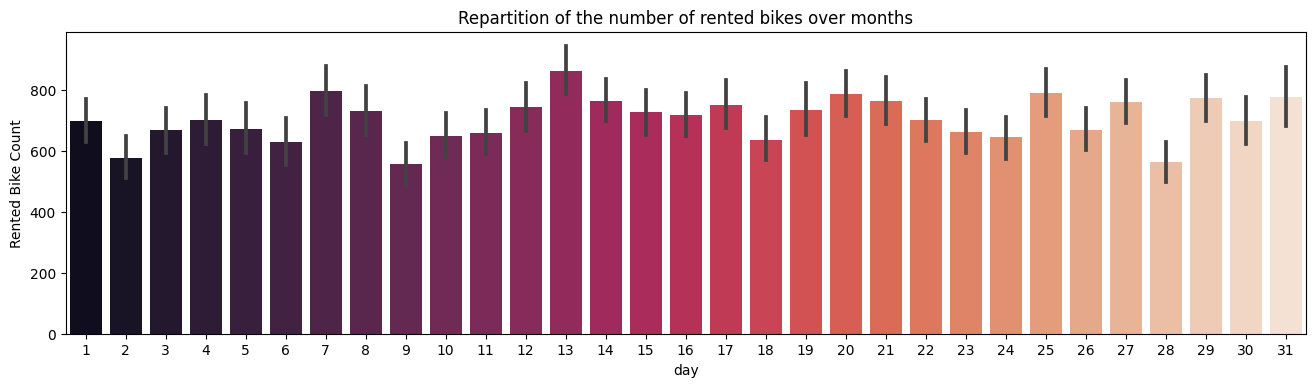

In [ ]:
plt.figure(figsize=(16,4), dpi=100)
plt.title("Repartition of the number of rented bikes over months")
sns.barplot(x="day", y="Rented Bike Count", data=df,palette='rocket')

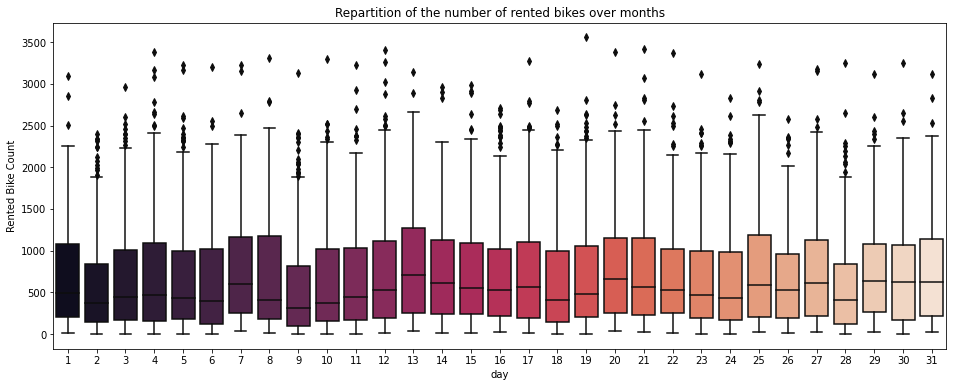

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Repartition of the number of rented bikes over months")
sns.boxplot(data=df,x="day",y="Rented Bike Count",palette="rocket")

#### By month

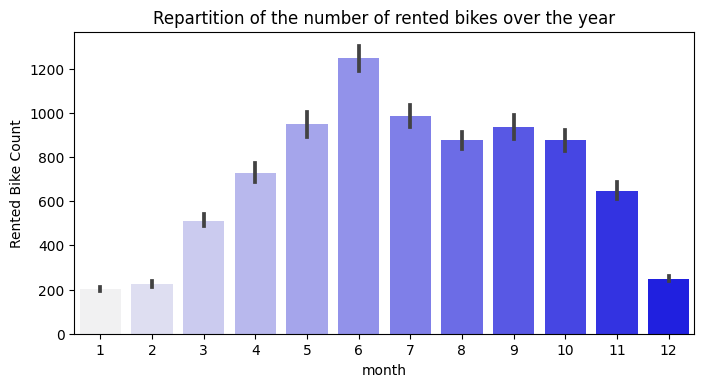

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
plt.title("Repartition of the number of rented bikes over the year")
sns.barplot(x="month", y="Rented Bike Count", data=df,palette="light:b")

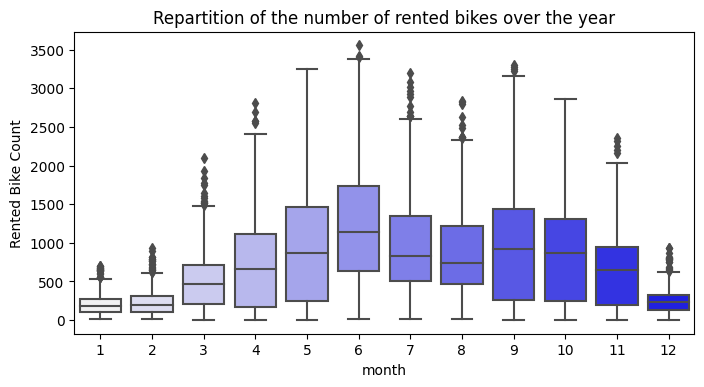

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
plt.title("Repartition of the number of rented bikes over the year")
sns.boxplot(x="month", y="Rented Bike Count", data=df,palette="light:b")

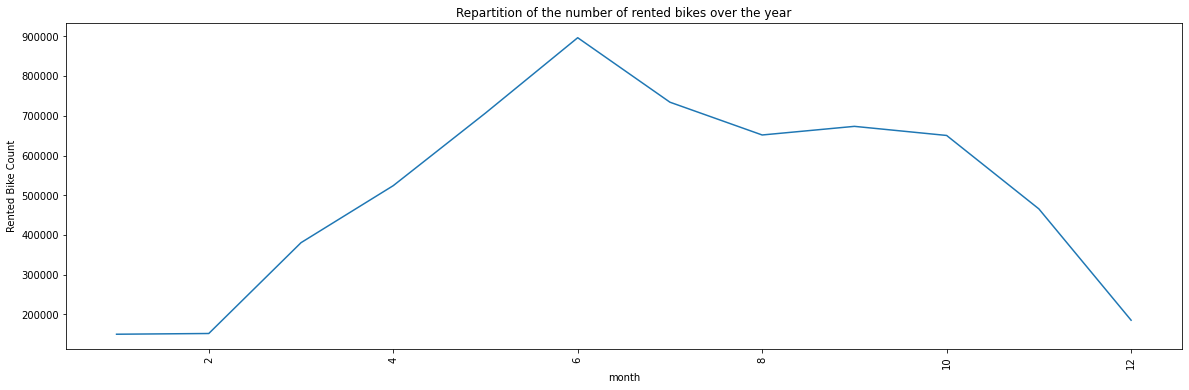

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "month", y = "Rented Bike Count", estimator = 'sum', ci = None)
plt.title("Repartition of the number of rented bikes over the year")
plt.xticks(rotation = 90);

### Encoding variables

Machine learning algorithms and deep learning neural networks require that input and output variables are numbers.This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model.



In [ ]:
df = df.drop("Dew point temperature(°C)", axis=1) #We drop it cuz similar to temperature
df["Holiday"]= np.where(df["Holiday"].str.contains("No Holiday"),0,1)
df["Functioning Day"]= np.where(df["Functioning Day"].str.contains("No"),0,1)
df['Seasons']=df['Seasons'].map({"Winter":1,"Spring":2,"Summer":3,"Autumn":4})

Let's take a new look at how variables are correlated with our target variable **Rented Bike Count**

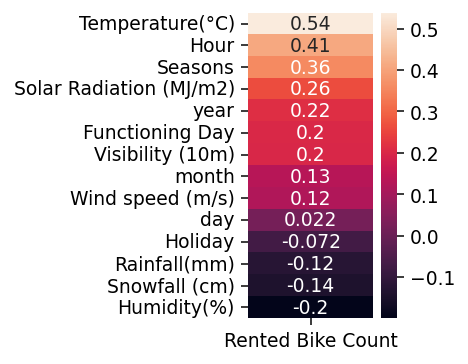

In [ ]:
plt.figure(figsize=(1.5,3), dpi=135)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values(by="Rented Bike Count", ascending=False)[1:],annot=True)

Thanks to the encoding we can observe a high correlation between **Seasons** and **Rented Bike Count**

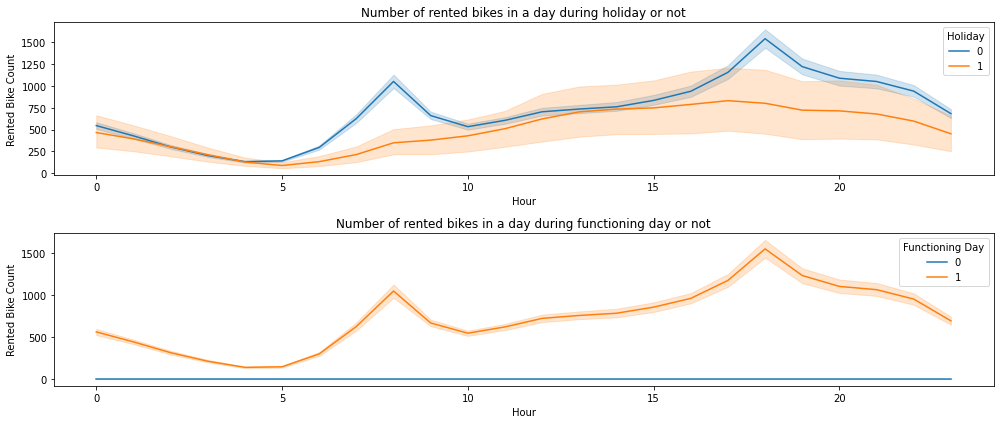

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(14,6))
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0], hue="Holiday").set_title("Number of rented bikes in a day during holiday or not")
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], hue="Functioning Day").set_title("Number of rented bikes in a day during functioning day or not")
plt.tight_layout()

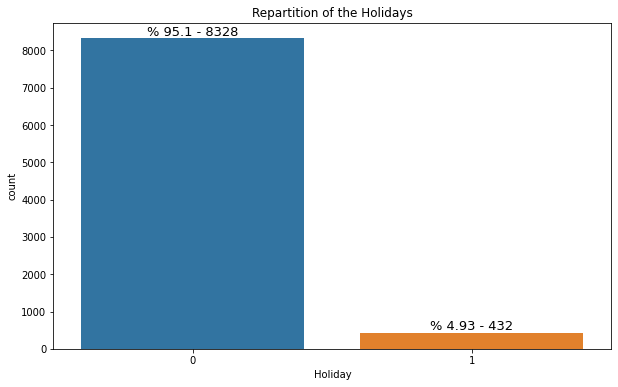

In [ ]:
perc = df["Holiday"].value_counts().sum()/100
plt.figure(figsize=(10,6))
plt.title("Repartition of the Holidays")
sns.countplot(data = df, x = "Holiday");
for index,value in enumerate(df["Holiday"].value_counts()):
    plt.text(index, value, f"% {value/perc:.3} - {value}", ha="center", va="bottom", fontsize = 13)

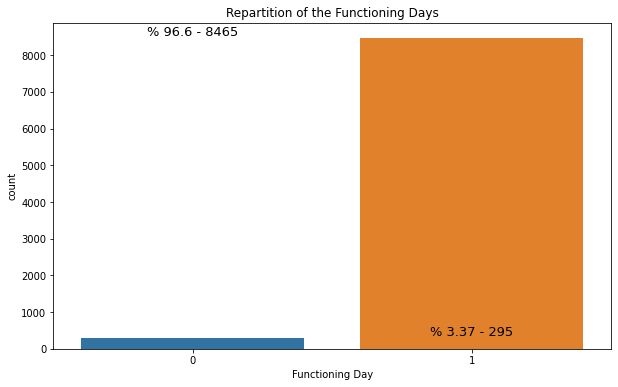

In [ ]:
perc = df["Functioning Day"].value_counts().sum()/100
plt.figure(figsize=(10,6))
plt.title("Repartition of the Functioning Days")
sns.countplot(data = df, x = "Functioning Day");
for index,value in enumerate(df["Functioning Day"].value_counts()):
    plt.text(index, value, f"% {value/perc:.3} - {value}", ha="center", va="bottom", fontsize = 13)

# Preprocessing 🌐

## New variables

Let's try to create new variables

We create the variable **is_night** which depend on the column **Hour**. We suppose that between 8pm and 8am it is the night. It is usually colder the night and there is less visibility use bikes the most during the day.

In [ ]:
df['is_night'] = 0
df.loc[(df['Hour'] < 8) | (df['Hour'] > 20), 'is_night'] = 1


## Feature selection

I use the Gradient Boosting Regressor model to calculate the import for each attribute in the dataset. This model construct boosted trees, and the most important features are the ones which help the most constructing the boosted decision trees, the most useful and valuable features.

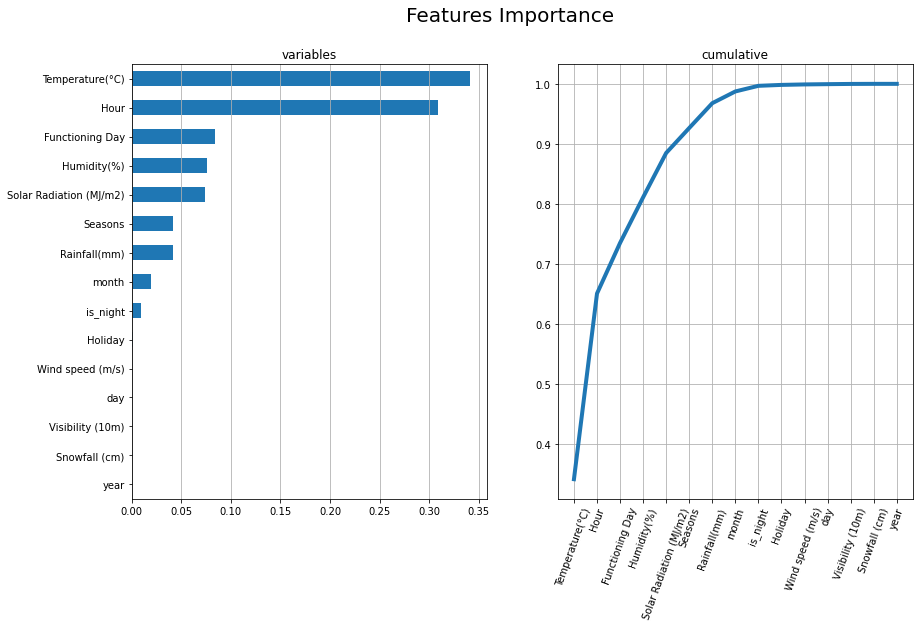

In [ ]:
#Split the data set
df.drop(['Date'],axis=1,inplace=True)
X = df.drop("Rented Bike Count", axis=1).values
y = df["Rented Bike Count"].values
feature_names = df.drop("Rented Bike Count", axis=1).columns.tolist()
## model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
df_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(14,8))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4,legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)),xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

Looking at the plot above we select the features which are the most important to have the best score for the predictions.

In [ ]:
features = ["Rented Bike Count","Temperature(°C)","Hour","Functioning Day","Solar Radiation (MJ/m2)","Humidity(%)","Seasons","Rainfall(mm)","month","is_night"]
df = df[features]
X = df.drop("Rented Bike Count", axis=1).values
y = df["Rented Bike Count"].values

## Scaling

To scale the data I chose the standardization because it is more
efficient to compare measurements that have differents units.

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=12)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Models and predictions 🔄

In [ ]:
performances = {}

def predict (model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  R2 = round(model.score(X_test,y_test),4)
  ajd_R2 = round(1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4)
  RMSE = round (np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)
  performances[str(model)] = [R2]
  #plot
  fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(25,6))
  fig.suptitle(str(model), fontsize=20,y=1.04)
  sns.regplot(x=y_pred, y=y_test, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"},ax=axs[0])
  axs[0].set_xlabel('Predicted')
  axs[0].set_ylabel('Actual')
  box = '\n'.join(("R²: "+ str(R2), "Adj R²: "+str(ajd_R2), "RMSE: "+str(RMSE)))
  axs[0].text(200, 3100, box, fontsize=12, va='top', ha="left", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
  axs[0].set(title="Scatter plot - Actual vs predicted values")
  axs[1].plot(y_test,label="Actual data")
  axs[1].plot(y_pred,label="predicted values")
  axs[1].legend(loc="best")
  axs[1].set(title="Actual vs predicted values")
  sns.distplot((y_test - y_pred), color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=axs[2])
  axs[2].grid(True)
  axs[2].set(title="Residuals distribution")

def best_parameters (model,parameters):
  grid = GridSearchCV(model,parameters,cv=5,verbose=0)
  grid.fit(X_train,y_train)
  return grid.best_estimator_,grid.best_score_

## Linear Regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



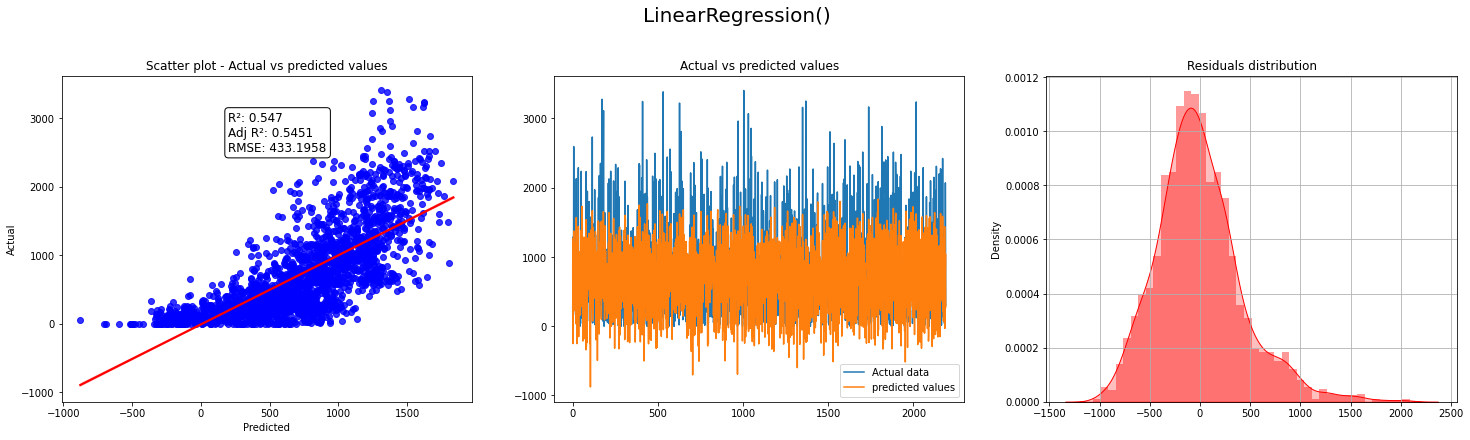

In [ ]:
linear_reg = LinearRegression()
predict(linear_reg)

## Decision Tree

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {"min_samples_split":[30,50,75]}
dtree = tree.DecisionTreeRegressor()
best_params = best_parameters(dtree,parameters)
best_params"""

'parameters = {"min_samples_split":[30,50,75]}\ndtree = tree.DecisionTreeRegressor()\nbest_params = best_parameters(dtree,parameters)\nbest_params'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



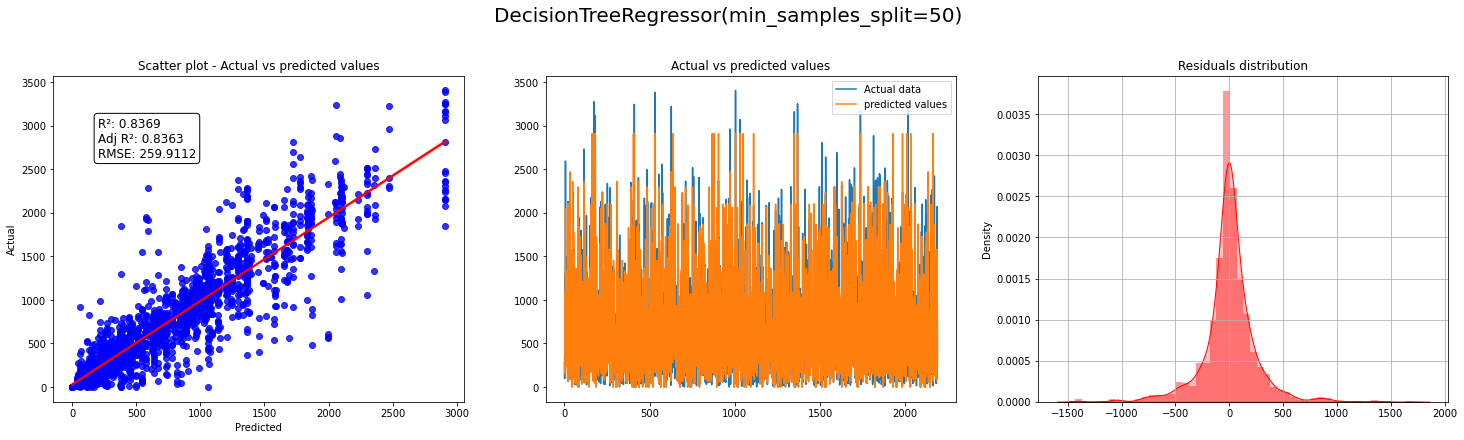

In [ ]:
dtree = tree.DecisionTreeRegressor(min_samples_split=50)
predict(dtree)

## Random Forest

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {"n_estimators":[750,1000],'max_depth' : [None,1,3,5]}
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
best_params = best_parameters(rforest,parameters)
best_params"""

'parameters = {"n_estimators":[750,1000],\'max_depth\' : [None,1,3,5]}\nrforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)\nbest_params = best_parameters(rforest,parameters)\nbest_params'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



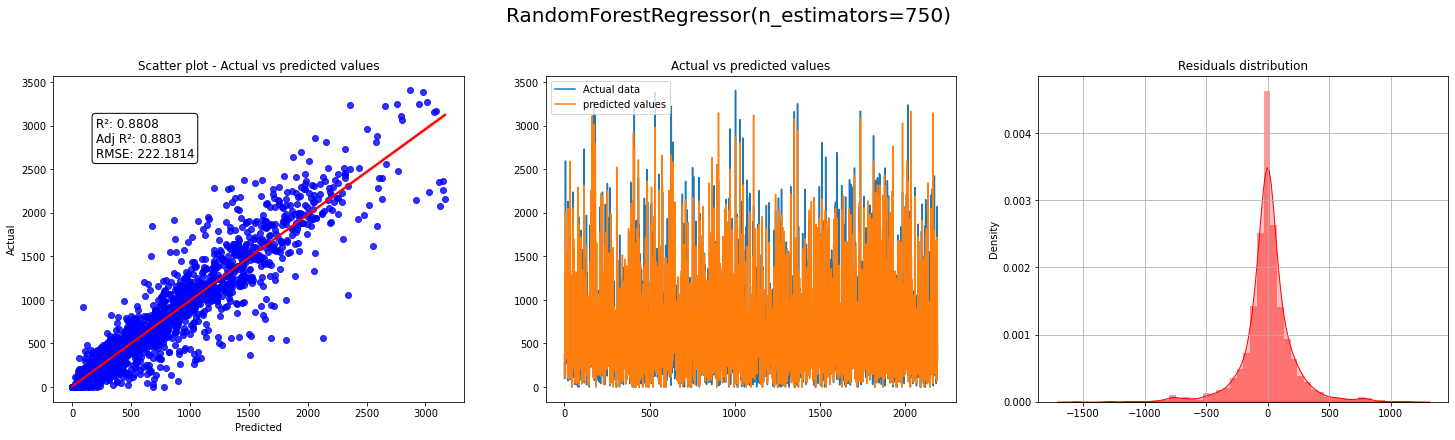

In [ ]:
rforest = RandomForestRegressor(n_estimators=750,max_depth=None)
predict(rforest)

## KNN

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {'n_neighbors':[5,6,7]}
knn = neighbors.KNeighborsRegressor()
best_params = best_parameters(knn,parameters)
best_params"""

"parameters = {'n_neighbors':[5,6,7]}\nknn = neighbors.KNeighborsRegressor()\nbest_params = best_parameters(knn,parameters)\nbest_params"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



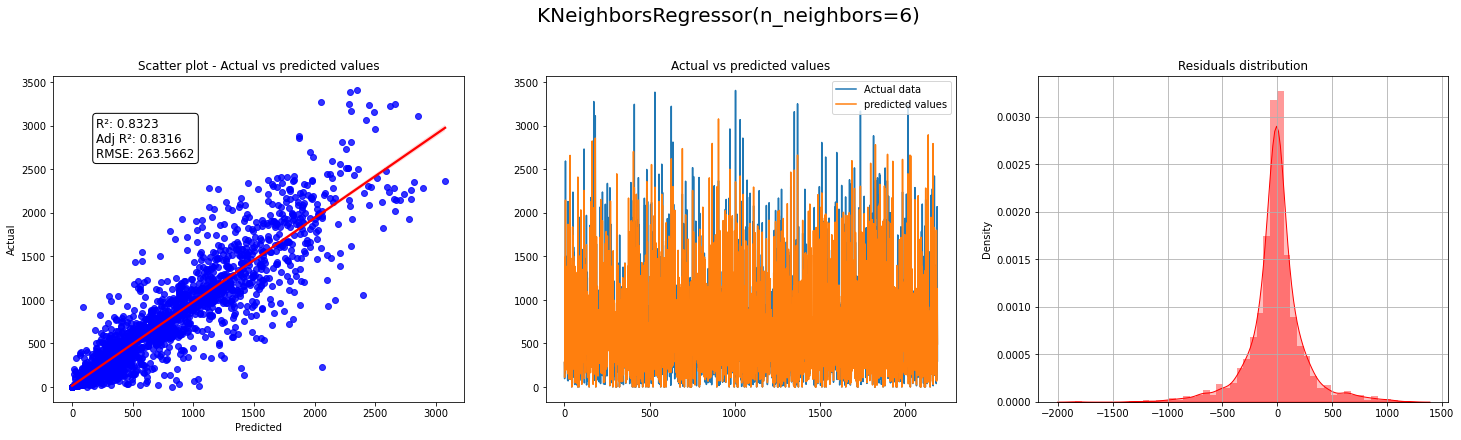

In [ ]:
knn = neighbors.KNeighborsRegressor(6)
predict(knn)

## Support Vector Regression

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {"kernel":["rbf"],"C": [5,6],"epsilon":[0.5,0.6,0.7]}
svr = SVR()
best_params = best_parameters(svr,parameters)
best_params"""

'parameters = {"kernel":["rbf"],"C": [5,6],"epsilon":[0.5,0.6,0.7]}\nsvr = SVR()\nbest_params = best_parameters(svr,parameters)\nbest_params'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



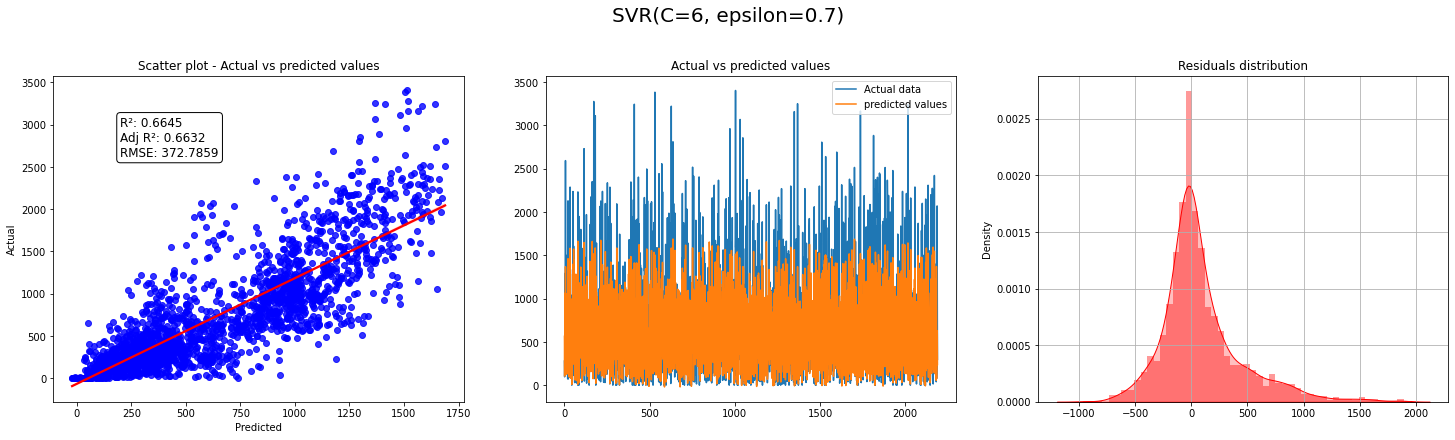

In [ ]:
svr = SVR(kernel="rbf",C=6,epsilon=0.7)
predict(svr)

## Bayesian Ridge

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



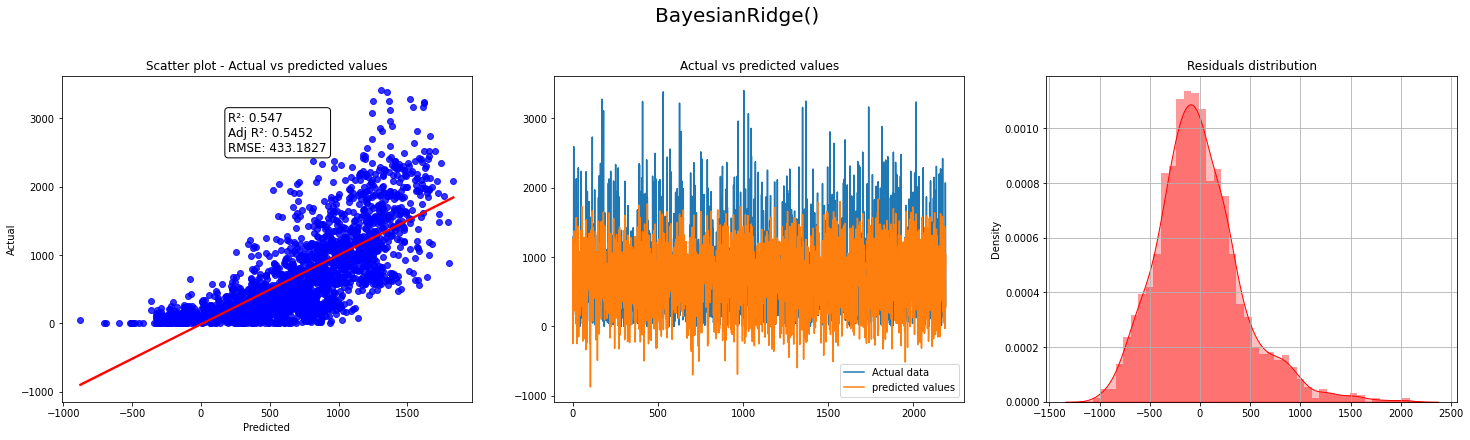

In [ ]:
bayesian = BayesianRidge()
predict(bayesian)

## XGB

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {"max_depth":[3,4,5],"learning_rate":[0.01, 0.025],"n_estimators":[750,1000]}
xgb = XGBRegressor()
best_params = best_parameters(xgb,parameters)
best_params"""

'parameters = {"max_depth":[3,4,5],"learning_rate":[0.01, 0.025],"n_estimators":[750,1000]}\nxgb = XGBRegressor()\nbest_params = best_parameters(xgb,parameters)\nbest_params'

[23:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



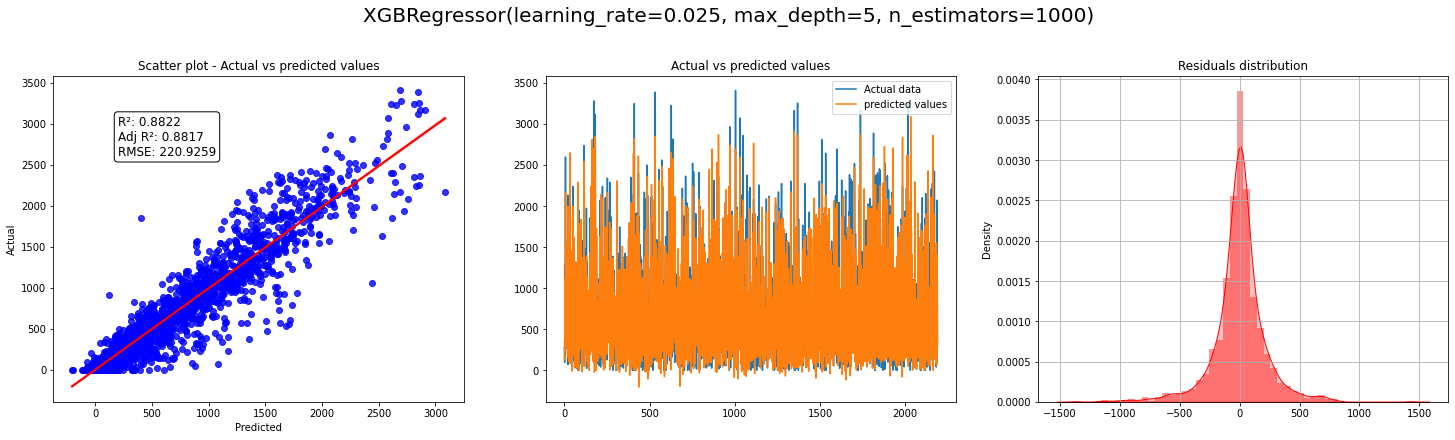

In [ ]:
xgb = XGBRegressor(learning_rate=0.025,n_estimators=1000,max_depth=5)
predict(xgb)

## LGBM

In [ ]:
#Gridsearch to select the best parameters
"""parameters = {'num_leaves': [30,40],'reg_alpha': [0,0.3],'n_estimators': [100],'lambda_l1': [0, 1, 1.5],'lambda_l2': [0, 1]}
lgbm = LGBMRegressor()
best_params = best_parameters(lgbm,parameters)
best_params"""

"parameters = {'num_leaves': [30,40],'reg_alpha': [0,0.3],'n_estimators': [100],'lambda_l1': [0, 1, 1.5],'lambda_l2': [0, 1]}\nlgbm = LGBMRegressor()\nbest_params = best_parameters(lgbm,parameters)\nbest_params"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



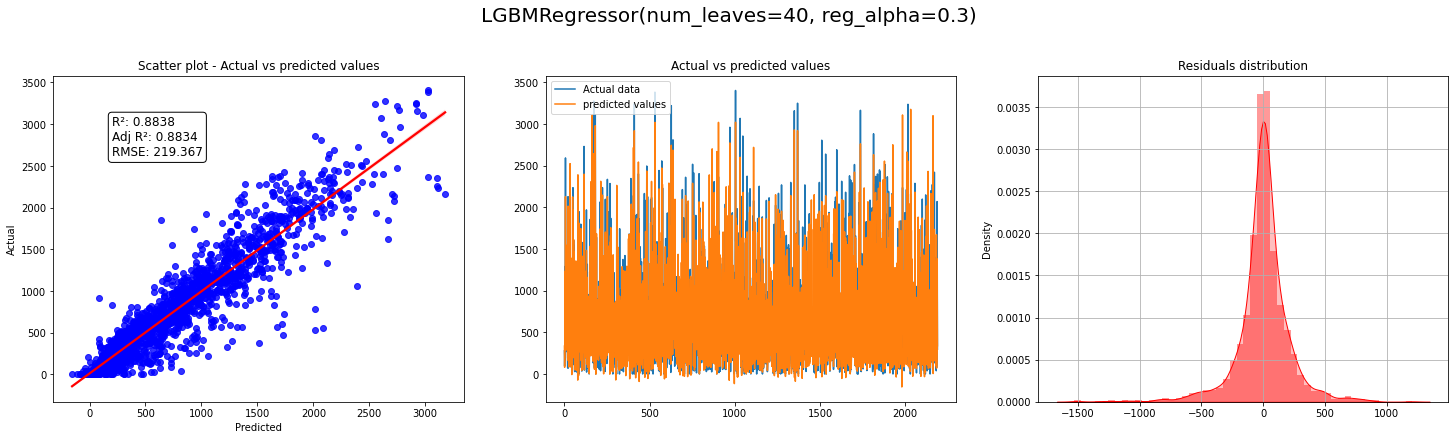

In [ ]:
lgbm = LGBMRegressor(num_leaves=40,reg_alpha=0.3)
predict(lgbm)

## Adaboost

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



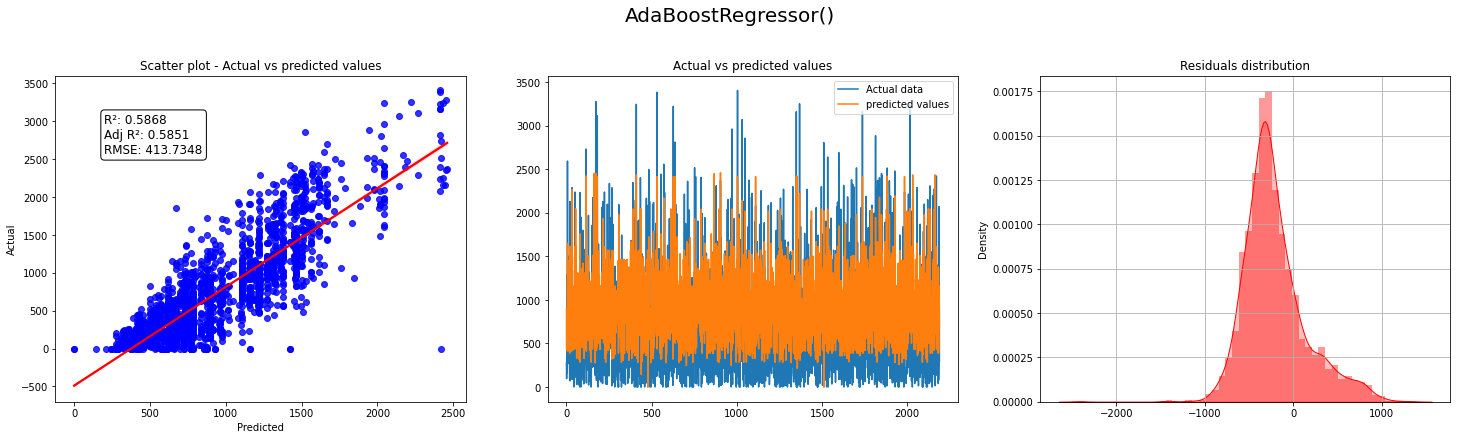

In [ ]:
ada = AdaBoostRegressor()
predict(ada)

#Performance and Evaluation 📈📐

In [ ]:
performances

{'LinearRegression()': [0.547],
 'DecisionTreeRegressor(min_samples_split=50)': [0.8369],
 'RandomForestRegressor(n_estimators=750)': [0.8808],
 'KNeighborsRegressor(n_neighbors=6)': [0.8323],
 'SVR(C=6, epsilon=0.7)': [0.6645],
 'BayesianRidge()': [0.547],
 'XGBRegressor(learning_rate=0.025, max_depth=5, n_estimators=1000)': [0.8822],
 'LGBMRegressor(num_leaves=40, reg_alpha=0.3)': [0.8838],
 'AdaBoostRegressor()': [0.5868]}

In [ ]:
perf = pd.DataFrame(performances).T
perf.columns=["performance"]
perf = perf.sort_values("performance",ascending=False)
perf

,performance
"LGBMRegressor(num_leaves=40, reg_alpha=0.3)",0.8838
"XGBRegressor(learning_rate=0.025, max_depth=5, n_estimators=1000)",0.8822
RandomForestRegressor(n_estimators=750),0.8808
DecisionTreeRegressor(min_samples_split=50),0.8369
KNeighborsRegressor(n_neighbors=6),0.8323
"SVR(C=6, epsilon=0.7)",0.6645
AdaBoostRegressor(),0.5868
LinearRegression(),0.5470
BayesianRidge(),0.5470


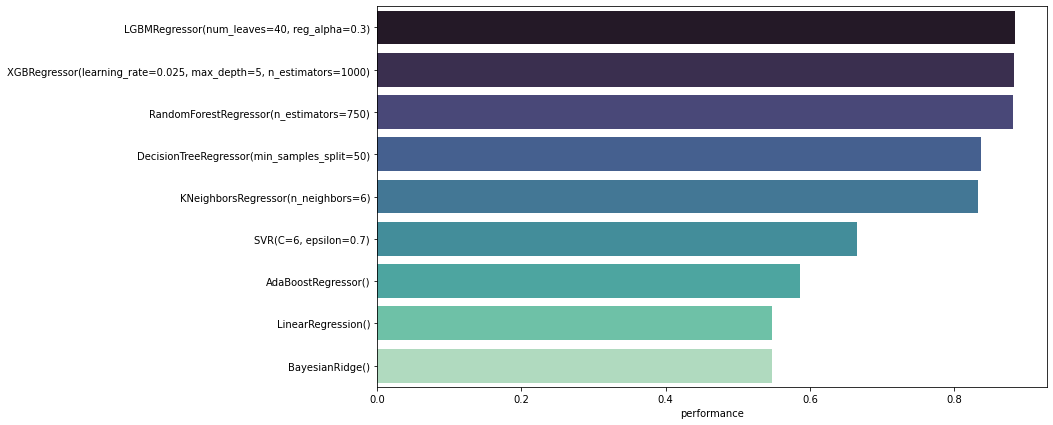

In [ ]:
plt.figure(figsize=(12,7))
p = sns.barplot(x="performance",y=perf.index,data=perf,ci=None,palette="mako")
plt.show()

The results obtained are pretty satisfying, the tree first ones are very closed from eachother with a score of :
- LightGBM : 0,8838
- XGBRegressor : 0,8822
- RandomForestRegressor : 0,8808

#Conclusion ✔️

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



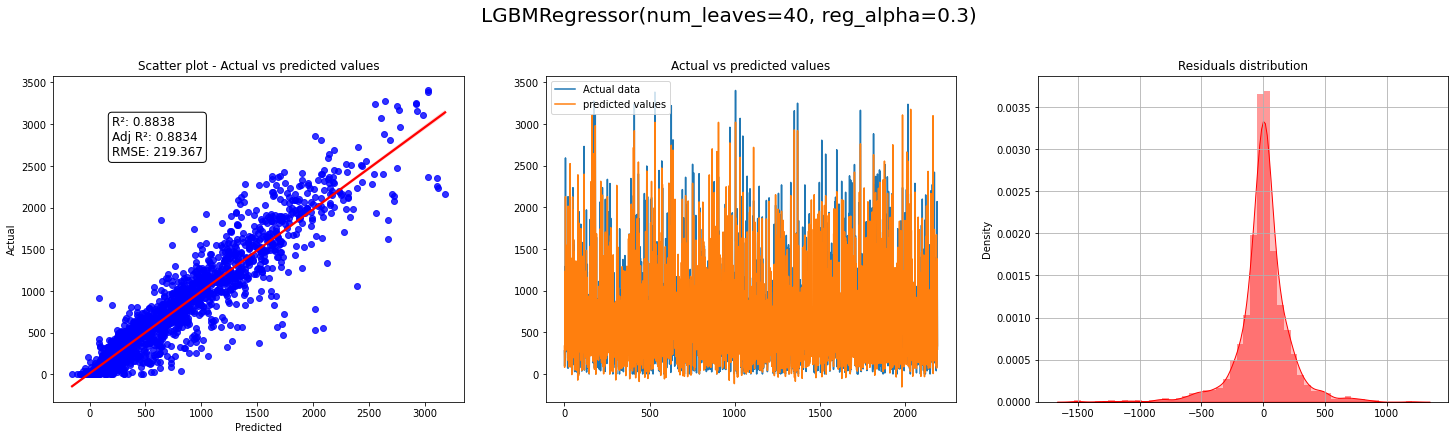

In [ ]:
lgbm = LGBMRegressor(num_leaves=40,reg_alpha=0.3)
predict(lgbm)

With the LightGBM model the best achieved RMSLE score is 219.367 for a R² equal to 0.88.

We arrived at a very decent model for the the demand for shared bikes with the significant variables. Our model is capable to capture the trend and the extreme values, as we can see on the second plot, which is a really good thing. So, we can say that the overall perfomance is good.

#API - Streamerlit 💻

First of all we need to download Streamlit and Ngrok packages

In [ ]:
!pip install streamlit
!pip install pyngrok

`Restart the runtime`

We now need to create our app

In [ ]:
%%writefile project_api.py
import streamlit as st
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

st.title("API - Prediction of the number of rented bike")

#temperature
st.write("How much degree is it outside ?", "")
temperature = st.slider("Temperature (°C)", min_value=-20, max_value=50, value=0, step=1)

st.write("______________________", "")

#humidity
st.write("\nCan you guess the pourcentage of humidity then ? Is it sweltering ?", "")
humidity = st.slider("Humidity (%)", min_value=0, max_value=100, value=0, step=1)

st.write("______________________", "")

#solar radiation
st.write("I know it's hard to say but could you tell how much solar radiation there is ?", "")
solar_rad = st.slider("Solar radiation (MJ/m2)", min_value=0.00, max_value=4.00, value=0.00, step=0.01)

st.write("______________________", "")

#rainfall
st.write("Or maybe it's raining cats and dogs ?", "")
rainfall = st.slider("Rainfall (mm)", min_value=0.00, max_value=5.00, value=0.00, step=0.01)

st.write("______________________", "")

#hour
st.write("What time is it ?", "")
hour = st.slider("Hour", min_value=0, max_value=24, value=0, step=1)

#is_night
if hour<=8 or hour>=20 :
  is_night = 1
  night_com = "it must be dark outside then"
  night_str = "Yes"
else :
  is_night = 0
  night_com = "it's not dark outside yet"
  night_str = "No" 
st.write("Oh so ",night_com)

st.write("______________________", "")

#month
st.write("Which month are you in ?", "")
month_str = st.selectbox("Month",("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"))
month = 0
if month_str == "January":
  month = 1
elif month_str == "February":
  month = 2
elif month_str == "March":
  month = 3 
elif month_str == "April":
  month = 4 
elif month_str == "May":
  month = 5 
elif month_str == "June":
  month = 6 
elif month_str == "July":
  month = 7 
elif month_str == "August":
  month = 8 
elif month_str == "September":
  month = 9 
elif month_str == "October":
  month = 10 
elif month_str == "November":
  month = 11 
elif month_str == "December":
  month = 12

#Season
season = ""
season_str = ""
if month > 8 and month < 12 :
  season_str = "Autumn"
  season = 4
elif month == 12 or (month > 0 and month<3 ):
  season_str = "Winter"
  season = 1
elif month>2 and month < 6:
  season_str = "Spring"
  season = 2
elif month > 5 and month < 9:
  season_str = "Summer"
  season = 3
st.write("Nice so you're in ", season_str)
st.write("______________________", "")

#functioning day
st.write("Finally, if you wanna rent a bike now i guess you checked they are available ?", "")
func_day_str = st.selectbox("Are they ?",("Yes", "No"))
func_day = 1
if func_day_str == "No":
  func_day = 0

st.header("Informations")

st.write("If we want to summarize we have :")
st.markdown(
    f"""
    * Temperature : `{temperature}°C`
    * Hour : `{hour}`
    * Functioning Day : `{func_day_str}`
    * Solar Radiation : `{solar_rad}MJ/m2`
    * Humidity : `{humidity}%`
    * Seasons : `{season_str}` 
    * Rainfall(mm) : `{rainfall}mm`
    * month : `{month_str}`
    * is_night : `{night_str}`
    """
)
st.write("With this informations we can now predict the number of rented bikes needed")

#Creation of the dataframe
data = {"Temperature(°C)":[temperature],
     "Hour":[hour],
     "Functioning Day":[func_day],
     "Solar Radiation (MJ/m2)":[solar_rad],
     "Humidity(%)":[humidity],
     "Seasons":[season],
     "Rainfall(mm)":[rainfall],
     "month":[month],
     "is_night":[is_night]
     }

data = pd.DataFrame(data)
data = data.values

#import the data
path_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'
df = pd.read_csv(path_data,sep=",",encoding= 'unicode_escape')

#preprocessing of the data
df['Date'] = pd.to_datetime(df['Date'], format ="%d/%m/%Y")
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day']=df['Date'].dt.day
df = df.drop("Dew point temperature(°C)", axis=1) #We drop it cuz similar to temperature
df["Holiday"]= np.where(df["Holiday"].str.contains("No Holiday"),0,1)
df["Functioning Day"]= np.where(df["Functioning Day"].str.contains("Yes"),1,0)
df['Seasons']=df['Seasons'].map({"Winter":1,"Spring":2,"Summer":3,"Autumn":4})
df['is_night'] = 0
df.loc[(df['Hour'] < 8) | (df['Hour'] > 20), 'is_night'] = 1
features = ["Rented Bike Count","Temperature(°C)","Hour","Functioning Day","Solar Radiation (MJ/m2)","Humidity(%)","Seasons","Rainfall(mm)","month","is_night"]
df = df[features]
X = df.drop("Rented Bike Count", axis=1).values
y = df["Rented Bike Count"].values
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=12)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
data = sc.transform(data)

#Prediction
st.header("Prediction using LightGBM model")
lgbm = LGBMRegressor(num_leaves=40,reg_alpha=0.3)
lgbm.fit(X_train,y_train)
predict = st.button("Predict")
pred = 0
if predict:
  pred = lgbm.predict(data)
st.write(f"Rented Bike Count : `{pred}`")

Overwriting project_api.py


To display the api, i use Ngork using my token

In [ ]:
!ngrok authtoken 239LOEYzLnPqByVmZ8eQmoqfYZi_6D6ExffxPb2jFC4eMAqik
from pyngrok import ngrok
!streamlit run --server.port 80 project_api.py&>/dev/null&

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pgrep streamlit

2344


In [ ]:
publ_url = ngrok.connect(port='8501')
publ_url

<NgrokTunnel: "http://1df8-34-123-1-182.ngrok.io" -> "http://localhost:80">

Try it by clicking on the link just above

It takes a little time to load the page

In [ ]:
ngrok.kill()